In [563]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor 
warnings.filterwarnings("ignore")

In [564]:
seinfeld = pd.read_csv('seinfeld episode rankings.csv')

In [565]:
seinfeld

,Title,Plot,Quotability/cultural impact,Laughs,Total score,IMDb rating,IMDb rank,Notes,Season,episode
0,good_news_bad_news,4.0,7.0,7.0,8.521739,7.6,166.0,2nd button joke,1.0,1.0
1,male_unbonding,3.0,6.5,2.0,1.695652,7.3,173.0,Kramer's pizza idea,1.0,2.0
2,the_stakeout,4.0,7.0,9.0,10.956522,7.7,160.0,Art Vandelay first appearance,1.0,3.0
3,the_robbery,3.0,3.5,5.5,2.510870,7.6,166.0,NaN,1.0,4.0
4,the_stock_tip,3.0,3.0,6.5,2.543478,7.5,168.0,NaN,1.0,5.0
...,...,...,...,...,...,...,...,...,...,...
175,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
176,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
177,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
178,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [566]:
seinfeld.columns=['title','plot','quotability','laughs','total_score','imdb_rating','imdb_rank','notes','season','episode']

In [567]:
seinfeld=seinfeld[seinfeld.season<7]

In [568]:
seinfeld.sort_values('total_score',ascending=False)

,title,plot,quotability,laughs,total_score,imdb_rating,imdb_rank,notes,season,episode
77,the_marine_biologist,5.0,9.0,52.0,101.739130,9.2,5.0,NaN,5.0,14.0
83,the_hamptons,5.0,9.0,48.0,93.913043,8.9,10.0,"""Shrinkage""",5.0,20.0
50,the_contest,5.0,10.0,31.0,67.391304,9.6,1.0,first appearance of Estelle.,4.0,11.0
74,the_conversion,5.0,9.0,30.0,58.695652,8.1,112.0,NaN,5.0,11.0
84,the_opposite,4.0,9.0,31.5,49.304348,9.6,1.0,NaN,5.0,21.0
...,...,...,...,...,...,...,...,...,...,...
89,the_couch,NaN,NaN,NaN,0.000000,8.1,112.0,NaN,6.0,5.0
88,the_chinese_woman,NaN,NaN,NaN,0.000000,8.1,112.0,NaN,6.0,4.0
87,the_pledge_drive,NaN,NaN,NaN,0.000000,8.2,98.0,NaN,6.0,3.0
86,the_big_salad,NaN,NaN,NaN,0.000000,8.1,112.0,NaN,6.0,2.0


In [569]:
scripts = pd.read_csv('seinfeld_data/scripts.csv')

In [570]:
episodes = pd.read_csv('seinfeld_data/episode_info.csv')

In [571]:
episodes = episodes.drop(columns='Unnamed: 0')

In [572]:
episodes.Title = episodes.Title.astype(str)

In [573]:
episodes.Title = episodes.Title.str.lower().str.replace(' ','_').str.replace(',','')

In [574]:
scripts = scripts.drop(columns='Unnamed: 0')

In [575]:
scripts[0:211].SEID = 'S01E00'
scripts[0:211].EpisodeNo = 0.0

In [576]:
episodes

,Season,EpisodeNo,Title,AirDate,Writers,Director,SEID
0,1.0,1.0,good_news_bad_news,"July 5, 1989","Larry David, Jerry Seinfeld",Art Wolff,S01E01
1,1.0,1.0,the_stakeout,"May 31, 1990","Larry David, Jerry Seinfeld",Tom Cherones,S01E01
2,1.0,2.0,the_robbery,"June 7, 1990",Matt Goldman,Tom Cherones,S01E02
3,1.0,3.0,male_unbonding,"June 14, 1990","Larry David, Jerry Seinfeld",Tom Cherones,S01E03
4,1.0,4.0,the_stock_tip,"June 21, 1990","Larry David, Jerry Seinfeld",Tom Cherones,S01E04
...,...,...,...,...,...,...,...
169,9.0,17.0,the_bookstore,"April 9, 1998",Spike Feresten,Andy Ackerman,S09E17
170,9.0,18.0,the_frogger,"April 23, 1998","Gregg Kavet, Andy Robin",Andy Ackerman,S09E18
171,9.0,19.0,the_maid,"April 30, 1998","Alec Berg, David Mandel, Jeff Schaffer",Andy Ackerman,S09E19
172,9.0,20.0,the_puerto_rican_day,"May 7, 1998","Alec Berg, Jennifer Crittenden, Spike Feresten...",Andy Ackerman,S09E20


In [577]:
episodes.SEID[0] = 'S01E00'
episodes.EpisodeNo[0] = 0.0

In [578]:
scripts

,Character,Dialogue,EpisodeNo,SEID,Season
0,JERRY,Do you know what this is all about? Do you kno...,0.0,S01E00,1.0
1,JERRY,"(pointing at Georges shirt) See, to me, that b...",0.0,S01E00,1.0
2,GEORGE,Are you through?,0.0,S01E00,1.0
3,JERRY,"You do of course try on, when you buy?",0.0,S01E00,1.0
4,GEORGE,"Yes, it was purple, I liked it, I dont actuall...",0.0,S01E00,1.0
...,...,...,...,...,...
54611,JERRY,Grand theft auto - don't steal any of my jokes.,23.0,S09E23,9.0
54612,PRISONER 3,You suck - I'm gonna cut you.,23.0,S09E23,9.0
54613,JERRY,"Hey, I don't come down to where you work, and ...",23.0,S09E23,9.0
54614,GUARD,"Alright, Seinfeld, that's it. Let's go. Come on.",23.0,S09E23,9.0


In [579]:
scripts[scripts.SEID=='S01E00']

,Character,Dialogue,EpisodeNo,SEID,Season
0,JERRY,Do you know what this is all about? Do you kno...,0.0,S01E00,1.0
1,JERRY,"(pointing at Georges shirt) See, to me, that b...",0.0,S01E00,1.0
2,GEORGE,Are you through?,0.0,S01E00,1.0
3,JERRY,"You do of course try on, when you buy?",0.0,S01E00,1.0
4,GEORGE,"Yes, it was purple, I liked it, I dont actuall...",0.0,S01E00,1.0
...,...,...,...,...,...
206,LAURA,"Yeah, yeah, hes a great guy...",0.0,S01E00,1.0
207,JERRY,Yeah.,0.0,S01E00,1.0
208,LAURA,"Youd really like him, you know, I cant wait to...",0.0,S01E00,1.0
209,JERRY,Me too!,0.0,S01E00,1.0


In [580]:
scripts.Character=scripts.Character.str.replace(r"\(.*\)","")

In [581]:
line_count=scripts.Character.value_counts().head(475)

In [582]:
scripts.Character.str.strip().value_counts().head(10)

JERRY       14905
GEORGE       9781
ELAINE       8073
KRAMER       6723
NEWMAN        649
MORTY         507
HELEN         474
FRANK         438
SUSAN         382
[Setting      293
Name: Character, dtype: int64

In [583]:
episodes["SEID"] = episodes.SEID.astype(str)
scripts["SEID"] = scripts.SEID.astype(str)

In [584]:
scripts[scripts.SEID=='S01E04']

,Character,Dialogue,EpisodeNo,SEID,Season
1078,JERRY,Went out to dinner the other night. Check came...,4.0,S01E04,1.0
1079,JERRY,I think Superman probably has a very good sens...,4.0,S01E04,1.0
1080,GEORGE,I never heard him say anything really funny.,4.0,S01E04,1.0
1081,JERRY,"But its common sense. Hes got super strength, ...",4.0,S01E04,1.0
1082,GEORGE,"You would think that, but either youre born wi...",4.0,S01E04,1.0
...,...,...,...,...,...
1303,JERRY,We went over that.,4.0,S01E04,1.0
1304,GEORGE,Pst. (moves in close with Elaine and Jerry) Wi...,4.0,S01E04,1.0
1305,JERRY,A robot butcher?,4.0,S01E04,1.0
1306,GEORGE,"Shhhhh. If you want to get in, theres very lit...",4.0,S01E04,1.0


In [585]:
pd.merge(episodes, right=scripts, on='SEID')

,Season_x,EpisodeNo_x,Title,AirDate,Writers,Director,SEID,Character,Dialogue,EpisodeNo_y,Season_y
0,1.0,0.0,good_news_bad_news,"July 5, 1989","Larry David, Jerry Seinfeld",Art Wolff,S01E00,JERRY,Do you know what this is all about? Do you kno...,0.0,1.0
1,1.0,0.0,good_news_bad_news,"July 5, 1989","Larry David, Jerry Seinfeld",Art Wolff,S01E00,JERRY,"(pointing at Georges shirt) See, to me, that b...",0.0,1.0
2,1.0,0.0,good_news_bad_news,"July 5, 1989","Larry David, Jerry Seinfeld",Art Wolff,S01E00,GEORGE,Are you through?,0.0,1.0
3,1.0,0.0,good_news_bad_news,"July 5, 1989","Larry David, Jerry Seinfeld",Art Wolff,S01E00,JERRY,"You do of course try on, when you buy?",0.0,1.0
4,1.0,0.0,good_news_bad_news,"July 5, 1989","Larry David, Jerry Seinfeld",Art Wolff,S01E00,GEORGE,"Yes, it was purple, I liked it, I dont actuall...",0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
54611,9.0,23.0,the_finale,"May 14, 1998",Larry David,Andy Ackerman,S09E23,JERRY,Grand theft auto - don't steal any of my jokes.,23.0,9.0
54612,9.0,23.0,the_finale,"May 14, 1998",Larry David,Andy Ackerman,S09E23,PRISONER 3,You suck - I'm gonna cut you.,23.0,9.0
54613,9.0,23.0,the_finale,"May 14, 1998",Larry David,Andy Ackerman,S09E23,JERRY,"Hey, I don't come down to where you work, and ...",23.0,9.0
54614,9.0,23.0,the_finale,"May 14, 1998",Larry David,Andy Ackerman,S09E23,GUARD,"Alright, Seinfeld, that's it. Let's go. Come on.",23.0,9.0


In [586]:
seinfeld.title[0] = 'good_news_bad_news'

In [587]:
seinfeld

,title,plot,quotability,laughs,total_score,imdb_rating,imdb_rank,notes,season,episode
0,good_news_bad_news,4.0,7.0,7.0,8.521739,7.6,166.0,2nd button joke,1.0,1.0
1,male_unbonding,3.0,6.5,2.0,1.695652,7.3,173.0,Kramer's pizza idea,1.0,2.0
2,the_stakeout,4.0,7.0,9.0,10.956522,7.7,160.0,Art Vandelay first appearance,1.0,3.0
3,the_robbery,3.0,3.5,5.5,2.510870,7.6,166.0,NaN,1.0,4.0
4,the_stock_tip,3.0,3.0,6.5,2.543478,7.5,168.0,NaN,1.0,5.0
...,...,...,...,...,...,...,...,...,...,...
102,the_doodle,NaN,NaN,NaN,0.000000,8.2,98.0,NaN,6.0,18.0
103,the_fusilli_jerry,NaN,NaN,NaN,0.000000,8.7,24.0,NaN,6.0,19.0
104,the_diplomat's_club,NaN,NaN,NaN,0.000000,8.1,112.0,NaN,6.0,20.0
105,the_face_painter,NaN,NaN,NaN,0.000000,8.4,58.0,NaN,6.0,21.0


In [588]:
seinfeld

,title,plot,quotability,laughs,total_score,imdb_rating,imdb_rank,notes,season,episode
0,good_news_bad_news,4.0,7.0,7.0,8.521739,7.6,166.0,2nd button joke,1.0,1.0
1,male_unbonding,3.0,6.5,2.0,1.695652,7.3,173.0,Kramer's pizza idea,1.0,2.0
2,the_stakeout,4.0,7.0,9.0,10.956522,7.7,160.0,Art Vandelay first appearance,1.0,3.0
3,the_robbery,3.0,3.5,5.5,2.510870,7.6,166.0,NaN,1.0,4.0
4,the_stock_tip,3.0,3.0,6.5,2.543478,7.5,168.0,NaN,1.0,5.0
...,...,...,...,...,...,...,...,...,...,...
102,the_doodle,NaN,NaN,NaN,0.000000,8.2,98.0,NaN,6.0,18.0
103,the_fusilli_jerry,NaN,NaN,NaN,0.000000,8.7,24.0,NaN,6.0,19.0
104,the_diplomat's_club,NaN,NaN,NaN,0.000000,8.1,112.0,NaN,6.0,20.0
105,the_face_painter,NaN,NaN,NaN,0.000000,8.4,58.0,NaN,6.0,21.0


In [589]:
episodes.columns = episodes.columns.str.lower()


In [590]:
seinfeld.title = seinfeld.title.str.replace(r"\d:\d*","").str.strip().str.replace(' ','_').str.lower()

In [591]:
seinfeld[seinfeld.title=="the_cafe"]

,title,plot,quotability,laughs,total_score,imdb_rating,imdb_rank,notes,season,episode
23,the_cafe,4.0,6.0,9.5,9.913043,8.4,58.0,Babu’s first appearance,3.0,7.0


In [592]:
episodes[episodes.title=='the_cafe']

,season,episodeno,title,airdate,writers,director,seid
23,3.0,7.0,the_cafe,"November 6, 1991",Tom Leopold,Tom Cherones,S03E07


In [593]:
episodes.title.to_csv('titles.csv')

In [594]:
seinfeld=pd.merge(seinfeld, right = episodes, on='title')

In [595]:
seinfeld.sort_values('total_score',ascending=True).head(10)

,title,plot,quotability,laughs,total_score,imdb_rating,imdb_rank,notes,season_x,episode,season_y,episodeno,airdate,writers,director,seid
106,the_understudy,NaN,NaN,NaN,0.0,7.9,149.0,NaN,6.0,22.0,6.0,24.0,"May 18, 1995","Marjorie Gross, Carol Leifer",Andy Ackerman,S06E24
98,the_beard,NaN,NaN,NaN,0.0,8.2,98.0,NaN,6.0,14.0,6.0,16.0,"February 9, 1995",Carol Leifer,Andy Ackerman,S06E16
97,the_scofflaw,NaN,NaN,NaN,0.0,8.0,135.0,NaN,6.0,13.0,6.0,13.0,"January 26, 1995",Peter Mehlman,Andy Ackerman,S06E13
96,the_label_maker,NaN,NaN,NaN,0.0,8.5,49.0,NaN,6.0,12.0,6.0,12.0,"January 19, 1995","Alec Berg, Jeff Schaffer",Andy Ackerman,S06E12
95,the_switch,NaN,NaN,NaN,0.0,8.9,10.0,NaN,6.0,11.0,6.0,11.0,"January 5, 1995",Bruce Kirschbaum and Sam Kass,Andy Ackerman,S06E11
94,the_race,NaN,NaN,NaN,0.0,8.9,10.0,NaN,6.0,10.0,6.0,10.0,"December 15, 1994","Tom Gammill, Max Pross and Larry David",Andy Ackerman,S06E10
93,the_secretary,NaN,NaN,NaN,0.0,8.1,112.0,NaN,6.0,9.0,6.0,9.0,"December 8, 1994","Carol Leifer, Marjorie Gross",David Owen Trainor,S06E09
99,the_kiss_hello,NaN,NaN,NaN,0.0,8.2,98.0,NaN,6.0,15.0,6.0,17.0,"February 16, 1995","Larry David, Jerry Seinfeld",Andy Ackerman,S06E17
92,the_mom_&amp;_pop_store,NaN,NaN,NaN,0.0,8.1,112.0,NaN,6.0,8.0,6.0,8.0,"November 17, 1994","Tom Gammill, Max Pross",Andy Ackerman,S06E08
90,the_gymnast,NaN,NaN,NaN,0.0,8.2,98.0,NaN,6.0,6.0,6.0,6.0,"November 3, 1994","Alec Berg, Jeff Schaffer",Andy Ackerman,S06E06


In [596]:
seinfeld.director = seinfeld.director.replace('David&nbsp; Steinberg','David Steinberg')

In [597]:
seinfeld.director.value_counts()

Tom Cherones          80
Andy Ackerman         21
David Steinberg        2
Art Wolff              1
Joshua White           1
Jason Alexander        1
David Owen Trainor     1
Name: director, dtype: int64

In [598]:
scripts.Character = scripts.Character.str.strip()
scripts.Character = scripts.Character.replace(r'babu.*|BABU.*','BABU')

In [599]:
scripts.Character.nunique()

1214

In [600]:
scripts=scripts[~scripts.Character.str.contains(r'\(\*|[a-z]|http')]

In [601]:
#scripts = scripts.drop(index=scripts[(scripts.Character==r'http')|(scripts.Dialogue.isnull())].index.tolist())
grouped_scripts=scripts.groupby('SEID')

In [602]:
for key, item in grouped_scripts:
    print(grouped_scripts.get_group(key), "\n\n")

    Character                                           Dialogue  EpisodeNo  \
0       JERRY  Do you know what this is all about? Do you kno...        0.0   
1       JERRY  (pointing at Georges shirt) See, to me, that b...        0.0   
2      GEORGE                                   Are you through?        0.0   
3       JERRY             You do of course try on, when you buy?        0.0   
4      GEORGE  Yes, it was purple, I liked it, I dont actuall...        0.0   
..        ...                                                ...        ...   
206     LAURA                     Yeah, yeah, hes a great guy...        0.0   
207     JERRY                                              Yeah.        0.0   
208     LAURA  Youd really like him, you know, I cant wait to...        0.0   
209     JERRY                                            Me too!        0.0   
210     JERRY  I swear, I have absolutely no idea what women ...        0.0   

       SEID  Season  
0    S01E00     1.0  
1    S0

[314 rows x 5 columns] 


      Character                                           Dialogue  EpisodeNo  \
26624     JERRY                 (feeling face) Good shave today...        4.0   
26625    ELAINE  (sarcastic) Don't worry, Jerry, I can manage t...        4.0   
26626     JERRY  I'm thinkin' of lettin' my sideburns grow in a...        4.0   
26627    ELAINE                         Can we rest here a second.        4.0   
26628     JERRY                             (pause) Yeah, I guess.        4.0   
...         ...                                                ...        ...   
26936     JERRY                                               Hey.        4.0   
26937    GEORGE  I knew it!! (shuts cab door) I predicted it! (...        4.0   
26938    KRAMER  (triumphant) Hey, Jerry! Guess what! The Krame...        4.0   
26939    NOREEN                          (surprised) Who are you?!        4.0   
26940       MAN  I'm Frank Costanza's lawyer. (He starts pullin...        4.0   

 

In [603]:
seinfeld.writers.value_counts()

Larry David                                               24
Larry Charles                                             15
Larry David, Jerry Seinfeld                               13
Peter Mehlman                                             10
Tom Gammill, Max Pross                                     7
Alec Berg, Jeff Schaffer                                   3
Larry David and Larry Levin                                2
Carol Leifer                                               2
Bruce Kirschbaum                                           2
Larry David, Larry Charles                                 2
Andy Robin                                                 2
Tom Leopold                                                2
Elaine Pope, Larry Charles                                 1
Peter Mehlman, Carol Leifer                                1
Marjorie Gross                                             1
Gregg Kavet, Andy Robin                                    1
Bruce Kirschbaum and Sam

In [604]:
scripts = scripts.drop(index=scripts[scripts.Character=='http'].index.tolist())

In [605]:
for Character, Dialogue in grouped_scripts:
    #print(f'{SEID}')
    print('--------')
    print(f'{Character}: {Dialogue}')

--------
S01E00:     Character                                           Dialogue  EpisodeNo  \
0       JERRY  Do you know what this is all about? Do you kno...        0.0   
1       JERRY  (pointing at Georges shirt) See, to me, that b...        0.0   
2      GEORGE                                   Are you through?        0.0   
3       JERRY             You do of course try on, when you buy?        0.0   
4      GEORGE  Yes, it was purple, I liked it, I dont actuall...        0.0   
..        ...                                                ...        ...   
206     LAURA                     Yeah, yeah, hes a great guy...        0.0   
207     JERRY                                              Yeah.        0.0   
208     LAURA  Youd really like him, you know, I cant wait to...        0.0   
209     JERRY                                            Me too!        0.0   
210     JERRY  I swear, I have absolutely no idea what women ...        0.0   

       SEID  Season  
0    S01E00 

[331 rows x 5 columns]
--------
S06E06:       Character                                           Dialogue  EpisodeNo  \
27272     JERRY  I've never been able to figure out why they ma...        6.0   
27273     JERRY  I cannot believe Lindsay's still seeing you af...        6.0   
27274    GEORGE           I think she finds my stupidity charming.        6.0   
27275     JERRY                                      As we all do.        6.0   
27276    GEORGE  Yeah, anyway, she's uh, having some kind of a ...        6.0   
...         ...                                                ...        ...   
27550     KATYA  He'll be all right. I must go and be with Mish...        6.0   
27551     JERRY                                       Oh, why not?        6.0   
27552     KATYA  It has been three days since our night togethe...        6.0   
27553     JERRY                                            Really?        6.0   
27554     KATYA  In my country, they speak of a man so virile, ...   

In [606]:
import dask.dataframe as dd

In [607]:
scripts_dd=dd.from_pandas(scripts,npartitions=54615)

In [608]:
scripts_dd

,Character,Dialogue,EpisodeNo,SEID,Season
npartitions=53961,,,,,
0,object,object,float64,object,float64
1,...,...,...,...,...
...,...,...,...,...,...
54614,...,...,...,...,...
54615,...,...,...,...,...


In [609]:
seinfeld_prepped=seinfeld.drop(columns=['season_x','episode','notes','title','seid'])

In [610]:
#seinfeld_prepped.airdate=pd.to_datetime(seinfeld_prepped.airdate)
#seinfeld_prepped = seinfeld_prepped.set_index('airdate').sort_values(by='airdate')

In [611]:
seinfeld_prepped = pd.get_dummies(seinfeld_prepped, columns=['writers','director'], drop_first=True)

In [612]:
train=seinfeld_prepped[seinfeld_prepped.season_y<4]
validate=seinfeld_prepped[seinfeld_prepped.season_y>3]

In [613]:
train

,plot,quotability,laughs,total_score,imdb_rating,imdb_rank,season_y,episodeno,airdate,"writers_Andy Cowan and Larry David, Jerry Seinfeld",...,"writers_Tom Gammill, Max Pross","writers_Tom Gammill, Max Pross and Larry David","writers_Tom Gammill, Max Pross and Larry David, Jerry Seinfeld",writers_Tom Leopold,director_Art Wolff,director_David Owen Trainor,director_David Steinberg,director_Jason Alexander,director_Joshua White,director_Tom Cherones
0,4.0,7.0,7.0,8.521739,7.6,166.0,1.0,0.0,"July 5, 1989",0,...,0,0,0,0,1,0,0,0,0,0
1,3.0,6.5,2.0,1.695652,7.3,173.0,1.0,3.0,"June 14, 1990",0,...,0,0,0,0,0,0,0,0,0,1
2,4.0,7.0,9.0,10.956522,7.7,160.0,1.0,1.0,"May 31, 1990",0,...,0,0,0,0,0,0,0,0,0,1
3,3.0,3.5,5.5,2.510870,7.6,166.0,1.0,2.0,"June 7, 1990",0,...,0,0,0,0,0,0,0,0,0,1
4,3.0,3.0,6.5,2.543478,7.5,168.0,1.0,4.0,"June 21, 1990",0,...,0,0,0,0,0,0,0,0,0,1
5,3.0,5.0,7.5,4.891304,7.7,160.0,2.0,1.0,"January 16, 1991",0,...,0,0,0,0,0,0,0,0,0,1
6,4.0,5.0,8.0,6.956522,7.9,149.0,2.0,2.0,"January 30, 1991",0,...,0,0,0,0,0,0,0,0,0,1
7,5.0,6.0,8.5,11.086957,8.3,79.0,2.0,3.0,"February 6, 1991",0,...,0,0,0,0,0,0,0,0,0,1
8,4.0,3.0,13.5,7.043478,8.4,58.0,2.0,4.0,"February 13, 1991",0,...,0,0,0,0,0,0,0,0,0,1
9,2.0,7.0,9.5,5.782609,7.9,149.0,2.0,5.0,"April 4, 1991",0,...,0,0,0,0,0,0,0,0,0,1


In [614]:
def get_script():
    for i in seinfeld.seid.to_list():
        for episode in scripts.SEID.to_list():
            script=f'TITLE: {i}\n'
            if str(scripts.SEID) == str(i):
                script += f'{scripts.Character}: {scripts.Dialogue}'
            else:
                continue
            return(script)

In [615]:
seinfeld

,title,plot,quotability,laughs,total_score,imdb_rating,imdb_rank,notes,season_x,episode,season_y,episodeno,airdate,writers,director,seid
0,good_news_bad_news,4.0,7.0,7.0,8.521739,7.6,166.0,2nd button joke,1.0,1.0,1.0,0.0,"July 5, 1989","Larry David, Jerry Seinfeld",Art Wolff,S01E00
1,male_unbonding,3.0,6.5,2.0,1.695652,7.3,173.0,Kramer's pizza idea,1.0,2.0,1.0,3.0,"June 14, 1990","Larry David, Jerry Seinfeld",Tom Cherones,S01E03
2,the_stakeout,4.0,7.0,9.0,10.956522,7.7,160.0,Art Vandelay first appearance,1.0,3.0,1.0,1.0,"May 31, 1990","Larry David, Jerry Seinfeld",Tom Cherones,S01E01
3,the_robbery,3.0,3.5,5.5,2.510870,7.6,166.0,NaN,1.0,4.0,1.0,2.0,"June 7, 1990",Matt Goldman,Tom Cherones,S01E02
4,the_stock_tip,3.0,3.0,6.5,2.543478,7.5,168.0,NaN,1.0,5.0,1.0,4.0,"June 21, 1990","Larry David, Jerry Seinfeld",Tom Cherones,S01E04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,the_doodle,NaN,NaN,NaN,0.000000,8.2,98.0,NaN,6.0,18.0,6.0,20.0,"April 6, 1995","Alec Berg, Jeff Schaffer",Andy Ackerman,S06E20
103,the_fusilli_jerry,NaN,NaN,NaN,0.000000,8.7,24.0,NaN,6.0,19.0,6.0,21.0,"April 27, 1995",Marjorie Gross,Andy Ackerman,S06E21
104,the_diplomat's_club,NaN,NaN,NaN,0.000000,8.1,112.0,NaN,6.0,20.0,6.0,22.0,"May 4, 1995","Tom Gammill, Max Pross",Andy Ackerman,S06E22
105,the_face_painter,NaN,NaN,NaN,0.000000,8.4,58.0,NaN,6.0,21.0,6.0,23.0,"May 11, 1995",Larry David,Andy Ackerman,S06E23


In [616]:
start = scripts.index[scripts.SEID=='S01E00'][0]
end = scripts.index[scripts.SEID=='S01E00'][-1] +1

In [617]:
seinfeld

,title,plot,quotability,laughs,total_score,imdb_rating,imdb_rank,notes,season_x,episode,season_y,episodeno,airdate,writers,director,seid
0,good_news_bad_news,4.0,7.0,7.0,8.521739,7.6,166.0,2nd button joke,1.0,1.0,1.0,0.0,"July 5, 1989","Larry David, Jerry Seinfeld",Art Wolff,S01E00
1,male_unbonding,3.0,6.5,2.0,1.695652,7.3,173.0,Kramer's pizza idea,1.0,2.0,1.0,3.0,"June 14, 1990","Larry David, Jerry Seinfeld",Tom Cherones,S01E03
2,the_stakeout,4.0,7.0,9.0,10.956522,7.7,160.0,Art Vandelay first appearance,1.0,3.0,1.0,1.0,"May 31, 1990","Larry David, Jerry Seinfeld",Tom Cherones,S01E01
3,the_robbery,3.0,3.5,5.5,2.510870,7.6,166.0,NaN,1.0,4.0,1.0,2.0,"June 7, 1990",Matt Goldman,Tom Cherones,S01E02
4,the_stock_tip,3.0,3.0,6.5,2.543478,7.5,168.0,NaN,1.0,5.0,1.0,4.0,"June 21, 1990","Larry David, Jerry Seinfeld",Tom Cherones,S01E04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,the_doodle,NaN,NaN,NaN,0.000000,8.2,98.0,NaN,6.0,18.0,6.0,20.0,"April 6, 1995","Alec Berg, Jeff Schaffer",Andy Ackerman,S06E20
103,the_fusilli_jerry,NaN,NaN,NaN,0.000000,8.7,24.0,NaN,6.0,19.0,6.0,21.0,"April 27, 1995",Marjorie Gross,Andy Ackerman,S06E21
104,the_diplomat's_club,NaN,NaN,NaN,0.000000,8.1,112.0,NaN,6.0,20.0,6.0,22.0,"May 4, 1995","Tom Gammill, Max Pross",Andy Ackerman,S06E22
105,the_face_painter,NaN,NaN,NaN,0.000000,8.4,58.0,NaN,6.0,21.0,6.0,23.0,"May 11, 1995",Larry David,Andy Ackerman,S06E23


In [618]:
train

,plot,quotability,laughs,total_score,imdb_rating,imdb_rank,season_y,episodeno,airdate,"writers_Andy Cowan and Larry David, Jerry Seinfeld",...,"writers_Tom Gammill, Max Pross","writers_Tom Gammill, Max Pross and Larry David","writers_Tom Gammill, Max Pross and Larry David, Jerry Seinfeld",writers_Tom Leopold,director_Art Wolff,director_David Owen Trainor,director_David Steinberg,director_Jason Alexander,director_Joshua White,director_Tom Cherones
0,4.0,7.0,7.0,8.521739,7.6,166.0,1.0,0.0,"July 5, 1989",0,...,0,0,0,0,1,0,0,0,0,0
1,3.0,6.5,2.0,1.695652,7.3,173.0,1.0,3.0,"June 14, 1990",0,...,0,0,0,0,0,0,0,0,0,1
2,4.0,7.0,9.0,10.956522,7.7,160.0,1.0,1.0,"May 31, 1990",0,...,0,0,0,0,0,0,0,0,0,1
3,3.0,3.5,5.5,2.510870,7.6,166.0,1.0,2.0,"June 7, 1990",0,...,0,0,0,0,0,0,0,0,0,1
4,3.0,3.0,6.5,2.543478,7.5,168.0,1.0,4.0,"June 21, 1990",0,...,0,0,0,0,0,0,0,0,0,1
5,3.0,5.0,7.5,4.891304,7.7,160.0,2.0,1.0,"January 16, 1991",0,...,0,0,0,0,0,0,0,0,0,1
6,4.0,5.0,8.0,6.956522,7.9,149.0,2.0,2.0,"January 30, 1991",0,...,0,0,0,0,0,0,0,0,0,1
7,5.0,6.0,8.5,11.086957,8.3,79.0,2.0,3.0,"February 6, 1991",0,...,0,0,0,0,0,0,0,0,0,1
8,4.0,3.0,13.5,7.043478,8.4,58.0,2.0,4.0,"February 13, 1991",0,...,0,0,0,0,0,0,0,0,0,1
9,2.0,7.0,9.5,5.782609,7.9,149.0,2.0,5.0,"April 4, 1991",0,...,0,0,0,0,0,0,0,0,0,1


In [619]:
x_train = train.drop(columns=['plot','quotability','laughs','total_score','airdate'])
y_train = train.total_score
x_validate = validate.drop(columns=['plot','quotability','laughs','total_score','airdate'])
y_validate = validate.total_score

In [620]:
regr = MLPRegressor( max_iter=1500).fit(x_train, y_train)

In [621]:
predictions=pd.DataFrame(regr.predict(x_validate),columns=['predict'])
regr.score(x_validate,y_validate)

-0.14251752180987864

In [622]:
y_validate=pd.concat([y_validate.reset_index(),predictions],axis=1)

<AxesSubplot:>

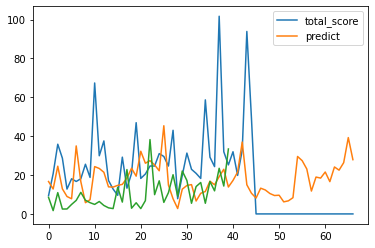

In [623]:
y_validate.drop(columns='index').plot()
y_train.plot()

<AxesSubplot:>

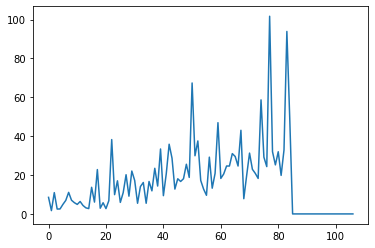

In [624]:
seinfeld.total_score.plot()

In [625]:
seinfeld_prepped.airdate = pd.to_datetime(seinfeld_prepped.airdate)
x=seinfeld_prepped.drop(columns=['plot','quotability','laughs','total_score']).set_index('airdate')
x_train = seinfeld_prepped.drop(columns=['plot','quotability','laughs','total_score'])[seinfeld_prepped.total_score > 0].set_index('airdate')
y_train = seinfeld_prepped.total_score[seinfeld_prepped.total_score > 0]
regr = MLPRegressor( max_iter=750,solver= 'lbfgs').fit(x_train,y_train)
predictions=pd.DataFrame(regr.predict(x),columns=['predict'])
y=pd.concat([y_train,predictions],axis=1)

<AxesSubplot:>

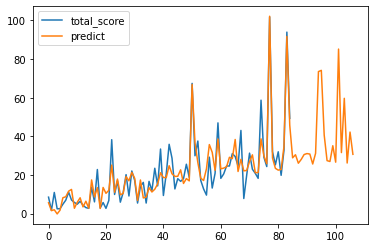

In [626]:
y.plot()

In [627]:
seinfeld

,title,plot,quotability,laughs,total_score,imdb_rating,imdb_rank,notes,season_x,episode,season_y,episodeno,airdate,writers,director,seid
0,good_news_bad_news,4.0,7.0,7.0,8.521739,7.6,166.0,2nd button joke,1.0,1.0,1.0,0.0,"July 5, 1989","Larry David, Jerry Seinfeld",Art Wolff,S01E00
1,male_unbonding,3.0,6.5,2.0,1.695652,7.3,173.0,Kramer's pizza idea,1.0,2.0,1.0,3.0,"June 14, 1990","Larry David, Jerry Seinfeld",Tom Cherones,S01E03
2,the_stakeout,4.0,7.0,9.0,10.956522,7.7,160.0,Art Vandelay first appearance,1.0,3.0,1.0,1.0,"May 31, 1990","Larry David, Jerry Seinfeld",Tom Cherones,S01E01
3,the_robbery,3.0,3.5,5.5,2.510870,7.6,166.0,NaN,1.0,4.0,1.0,2.0,"June 7, 1990",Matt Goldman,Tom Cherones,S01E02
4,the_stock_tip,3.0,3.0,6.5,2.543478,7.5,168.0,NaN,1.0,5.0,1.0,4.0,"June 21, 1990","Larry David, Jerry Seinfeld",Tom Cherones,S01E04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,the_doodle,NaN,NaN,NaN,0.000000,8.2,98.0,NaN,6.0,18.0,6.0,20.0,"April 6, 1995","Alec Berg, Jeff Schaffer",Andy Ackerman,S06E20
103,the_fusilli_jerry,NaN,NaN,NaN,0.000000,8.7,24.0,NaN,6.0,19.0,6.0,21.0,"April 27, 1995",Marjorie Gross,Andy Ackerman,S06E21
104,the_diplomat's_club,NaN,NaN,NaN,0.000000,8.1,112.0,NaN,6.0,20.0,6.0,22.0,"May 4, 1995","Tom Gammill, Max Pross",Andy Ackerman,S06E22
105,the_face_painter,NaN,NaN,NaN,0.000000,8.4,58.0,NaN,6.0,21.0,6.0,23.0,"May 11, 1995",Larry David,Andy Ackerman,S06E23


In [628]:
seinfeld_prepped.corr()

,plot,quotability,laughs,total_score,imdb_rating,imdb_rank,season_y,episodeno,"writers_Andy Cowan and Larry David, Jerry Seinfeld",writers_Andy Robin,...,"writers_Tom Gammill, Max Pross","writers_Tom Gammill, Max Pross and Larry David","writers_Tom Gammill, Max Pross and Larry David, Jerry Seinfeld",writers_Tom Leopold,director_Art Wolff,director_David Owen Trainor,director_David Steinberg,director_Jason Alexander,director_Joshua White,director_Tom Cherones
plot,1.000000,0.374945,0.366150,0.572487,0.398110,-0.398715,0.250004,0.021201,0.036349,0.051714,...,-0.018344,NaN,-0.104090,-0.048188,0.036349,NaN,-0.048188,-0.104090,-0.104090,0.109785
quotability,0.374945,1.000000,0.548741,0.653849,0.430066,-0.403678,0.607016,0.320533,0.118623,0.168766,...,0.108369,NaN,0.061818,-0.154504,0.005012,NaN,-0.154504,0.005012,0.005012,0.092642
laughs,0.366150,0.548741,1.000000,0.905072,0.571409,-0.522270,0.665317,0.412995,0.194177,0.098915,...,0.075191,NaN,0.277277,-0.114804,-0.119048,NaN,-0.101162,-0.042340,-0.112656,0.190752
total_score,0.572487,0.653849,0.905072,1.000000,0.483068,-0.428519,0.048310,0.191574,0.179031,0.143233,...,-0.085645,-0.089791,0.018307,-0.067966,-0.043328,-0.089791,-0.050198,-0.025075,-0.052455,0.480030
imdb_rating,0.398110,0.430066,0.571409,0.483068,1.000000,-0.954276,0.266299,0.315181,0.297440,0.090122,...,-0.031044,0.141430,0.007707,-0.099889,-0.148303,-0.036868,-0.004883,-0.059155,0.074568,0.023025
imdb_rank,-0.398715,-0.403678,-0.522270,-0.428519,-0.954276,1.000000,-0.230895,-0.311630,-0.168140,-0.129058,...,0.029383,-0.150744,-0.017378,0.068687,0.150781,0.046407,0.008265,0.090862,-0.102423,-0.046351
season_y,0.250004,0.607016,0.665317,0.048310,0.266299,-0.230895,1.000000,0.263995,0.065115,0.044927,...,0.281648,0.132108,0.065115,-0.097861,-0.202857,0.132108,-0.097861,-0.068871,-0.068871,-0.537872
episodeno,0.021201,0.320533,0.412995,0.191574,0.315181,-0.311630,0.263995,1.000000,0.156648,0.061798,...,0.013889,-0.013087,0.100070,0.001503,-0.154533,-0.027232,-0.119089,0.128359,-0.083810,-0.034526
"writers_Andy Cowan and Larry David, Jerry Seinfeld",0.036349,0.118623,0.194177,0.179031,0.297440,-0.168140,0.065115,0.156648,1.000000,-0.013405,...,-0.025698,-0.009434,-0.009434,-0.013405,-0.009434,-0.009434,-0.013405,-0.009434,-0.009434,0.056427
writers_Andy Robin,0.051714,0.168766,0.098915,0.143233,0.090122,-0.129058,0.044927,0.061798,-0.013405,1.000000,...,-0.036515,-0.013405,-0.013405,-0.019048,-0.013405,-0.013405,-0.019048,-0.013405,-0.013405,0.080178


In [629]:
seinfeld

,title,plot,quotability,laughs,total_score,imdb_rating,imdb_rank,notes,season_x,episode,season_y,episodeno,airdate,writers,director,seid
0,good_news_bad_news,4.0,7.0,7.0,8.521739,7.6,166.0,2nd button joke,1.0,1.0,1.0,0.0,"July 5, 1989","Larry David, Jerry Seinfeld",Art Wolff,S01E00
1,male_unbonding,3.0,6.5,2.0,1.695652,7.3,173.0,Kramer's pizza idea,1.0,2.0,1.0,3.0,"June 14, 1990","Larry David, Jerry Seinfeld",Tom Cherones,S01E03
2,the_stakeout,4.0,7.0,9.0,10.956522,7.7,160.0,Art Vandelay first appearance,1.0,3.0,1.0,1.0,"May 31, 1990","Larry David, Jerry Seinfeld",Tom Cherones,S01E01
3,the_robbery,3.0,3.5,5.5,2.510870,7.6,166.0,NaN,1.0,4.0,1.0,2.0,"June 7, 1990",Matt Goldman,Tom Cherones,S01E02
4,the_stock_tip,3.0,3.0,6.5,2.543478,7.5,168.0,NaN,1.0,5.0,1.0,4.0,"June 21, 1990","Larry David, Jerry Seinfeld",Tom Cherones,S01E04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,the_doodle,NaN,NaN,NaN,0.000000,8.2,98.0,NaN,6.0,18.0,6.0,20.0,"April 6, 1995","Alec Berg, Jeff Schaffer",Andy Ackerman,S06E20
103,the_fusilli_jerry,NaN,NaN,NaN,0.000000,8.7,24.0,NaN,6.0,19.0,6.0,21.0,"April 27, 1995",Marjorie Gross,Andy Ackerman,S06E21
104,the_diplomat's_club,NaN,NaN,NaN,0.000000,8.1,112.0,NaN,6.0,20.0,6.0,22.0,"May 4, 1995","Tom Gammill, Max Pross",Andy Ackerman,S06E22
105,the_face_painter,NaN,NaN,NaN,0.000000,8.4,58.0,NaN,6.0,21.0,6.0,23.0,"May 11, 1995",Larry David,Andy Ackerman,S06E23


In [630]:
from neuralprophet import NeuralProphet

In [631]:
seinfeld_prepped = seinfeld_prepped.rename(columns={'airdate':'ds'})

In [632]:
model = NeuralProphet()
score_pred = train.rename(columns={'airdate':'ds','total_score':'y'})[['ds', 'y']]
model.fit(score_pred)

ValueError: Column ds has duplicate values. Please remove duplicates.

In [ ]:
future = model.make_future_dataframe(seinfeld_prepped, periods=80, n_historic_predictions=True)
score_forecast = model.predict(future)

In [ ]:
bool_series = seinfeld_prepped.airdate.duplicated(keep = False)
 
# bool series
bool_series
 
# passing NOT of bool series to see unique values only
seinfeld_prepped = seinfeld_prepped[~bool_series]

In [ ]:
train = seinfeld_prepped[seinfeld_prepped.total_score>0]

In [ ]:
score_pred.ds.value_counts()